In [34]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

file_path = "datasets/Top_1000_Bollywood_Movies.csv"

df = pd.read_csv(file_path)

# Display the first 5 rows
print(df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(df.info())

filtered_data = df[df['Verdict'].isin(['All Time Blockbuster', 'Blockbuster'])]

# Sort the filtered data by 'India Net' earnings in descending order
sorted_data = filtered_data.sort_values(by='India Net', ascending=False)

# Select the top 10 highest-grossing movies
top_10_movies = sorted_data.head(10)
top_10_movies

| Unnamed: 0   | SN   | Movie                      | Worldwide   | India Net   | India Gross   | Overseas    | Budget     | Verdict              |
|:-------------|:-----|:---------------------------|:------------|:------------|:--------------|:------------|:-----------|:---------------------|
| 0            | 1    | Pathaan                    | 10500000000 | 5240000000  | 6570000000    | 3920000000  | 2500000000 | All Time Blockbuster |
| 1            | 2    | Baahubali 2 The Conclusion | 17880000000 | 5100000000  | 14160000000   | 3710000000  | 2500000000 | All Time Blockbuster |
| 2            | 3    | KGF Chapter 2              | 12080000000 | 4350000000  | 10000000000   | 2070000000  | 1000000000 | All Time Blockbuster |
| 3            | 4    | Dangal                     | 20700000000 | 3740000000  | 5350000000    | 15350000000 | 700000000  | All Time Blockbuster |
| 4            | 5    | Sanju                      | 5880000000  | 3420000000  | 4380000000    | 1500000000  | 1000000

,Unnamed: 0,SN,Movie,Worldwide,India Net,India Gross,Overseas,Budget,Verdict
0,0,1,Pathaan,10500000000,5240000000,6570000000,3920000000,2500000000,All Time Blockbuster
1,1,2,Baahubali 2 The Conclusion,17880000000,5100000000,14160000000,3710000000,2500000000,All Time Blockbuster
2,2,3,KGF Chapter 2,12080000000,4350000000,10000000000,2070000000,1000000000,All Time Blockbuster
3,3,4,Dangal,20700000000,3740000000,5350000000,15350000000,700000000,All Time Blockbuster
4,4,5,Sanju,5880000000,3420000000,4380000000,1500000000,1000000000,All Time Blockbuster
5,5,6,PK,7920000000,3400000000,4890000000,3030000000,850000000,All Time Blockbuster
6,6,7,Tiger Zinda Hai,5580000000,3390000000,4330000000,1240000000,2100000000,Blockbuster
7,7,8,Bajrangi Bhaijaan,9220000000,3200000000,4320000000,4890000000,900000000,All Time Blockbuster
8,8,9,War,4710000000,3030000000,3750000000,960000000,1500000000,Blockbuster
9,9,10,Padmaavat,5850000000,3020000000,4000000000,1850000000,2150000000,Blockbuster


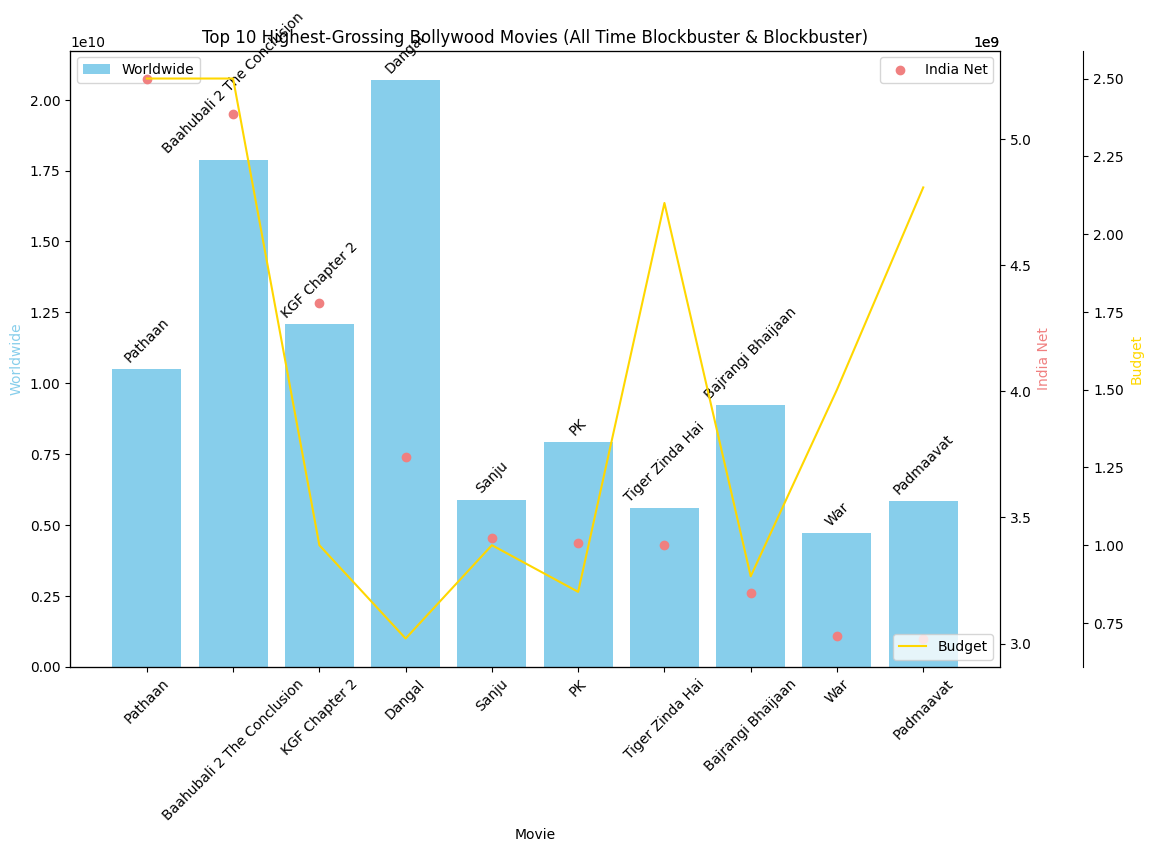

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
df = pd.read_csv('datasets/Top_1000_Bollywood_Movies.csv')

# Filter for 'All Time Blockbuster' and 'Blockbuster' movies
filtered_df = df[df['Verdict'].isin(['All Time Blockbuster', 'Blockbuster'])]

# Sort by 'India Net' in descending order and select top 10
filtered_df = filtered_df.sort_values(by='India Net', ascending=False).head(10)

# Remove non-numeric characters and convert columns to numeric
for col in ['Worldwide', 'India Net', 'Budget']:
    filtered_df[col] = filtered_df[col].astype(str).str.replace(r'[^\d.]', '', regex=True)
    filtered_df[col] = pd.to_numeric(filtered_df[col], errors='coerce')

# Create the figure and axes
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# Offset the third y-axis
ax3.spines['right'].set_position(('outward', 60))

# Plot 'Worldwide' on the primary y-axis
ax1.bar(filtered_df['Movie'], filtered_df['Worldwide'], color='skyblue', label='Worldwide')

# Plot 'India Net' on the secondary y-axis
ax2.scatter(filtered_df['Movie'], filtered_df['India Net'], color='lightcoral', label='India Net')

# Plot 'Budget' on the third y-axis
ax3.plot(filtered_df['Movie'], filtered_df['Budget'], color='gold', label='Budget')

# Add labels to data points
for i, txt in enumerate(filtered_df['Movie']):
    ax1.annotate(txt, (filtered_df['Movie'][i], filtered_df['Worldwide'][i]), textcoords="offset points", xytext=(0,5), ha='center', rotation=45)

# Add labels, title, and legend
ax1.set_xlabel('Movie')
ax1.set_ylabel('Worldwide', color='skyblue')
ax2.set_ylabel('India Net', color='lightcoral')
ax3.set_ylabel('Budget', color='gold')
plt.title('Top 10 Highest-Grossing Bollywood Movies (All Time Blockbuster & Blockbuster)')
ax1.tick_params(axis='x', rotation=45)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax3.legend(loc='lower right')

# Show the plot
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14644\385092327.py:28: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(movie_names, rotation=45, ha="right")


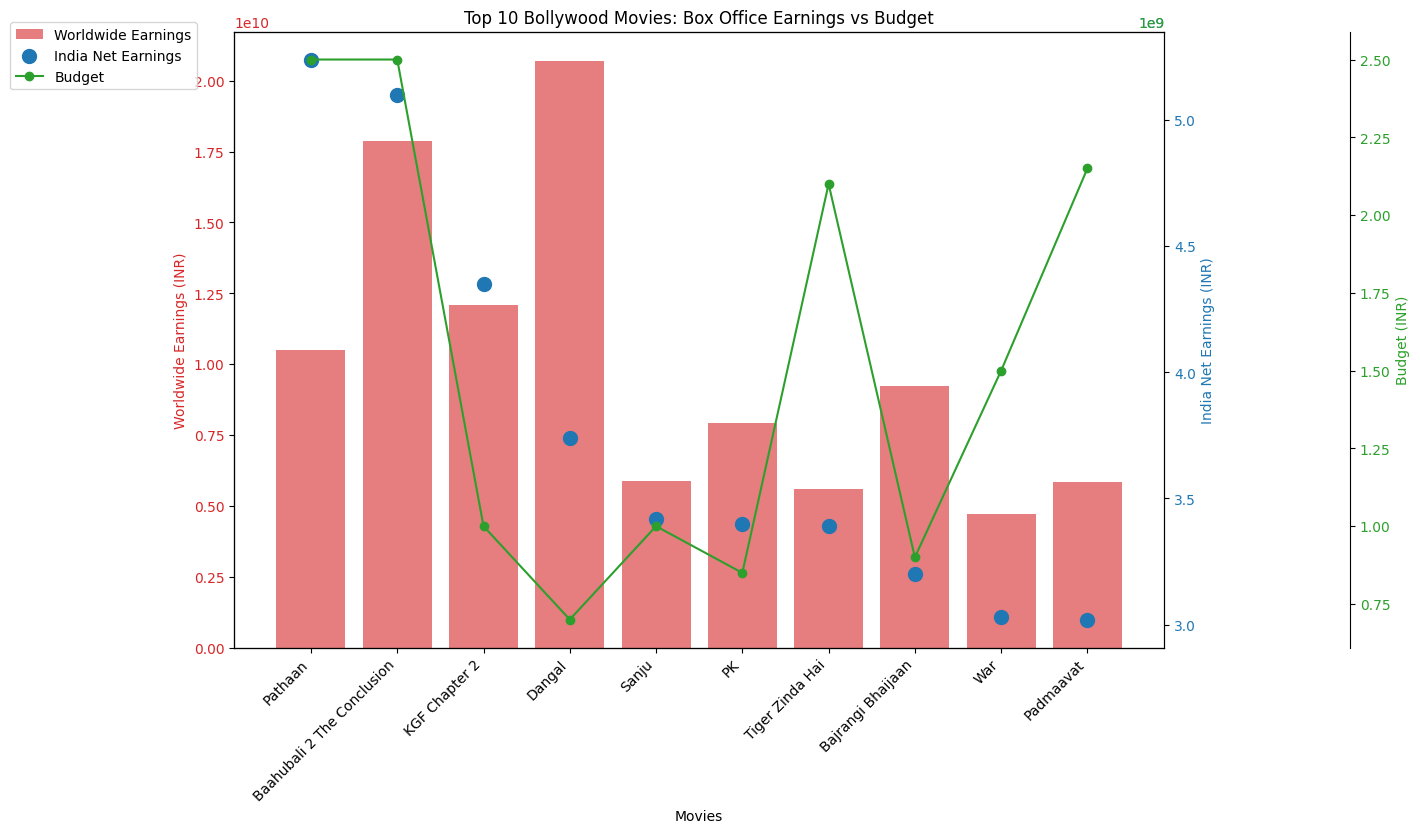

In [36]:
movies_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to understand its structure
movies_df.head()

# Filter the movies by 'Verdict' and then sort by 'India Net' earnings in descending order
filtered_movies = movies_df[(movies_df['Verdict'] == 'All Time Blockbuster') | (movies_df['Verdict'] == 'Blockbuster')]
sorted_movies = filtered_movies.sort_values(by='India Net', ascending=False).head(10)

# Prepare the data for plotting
movie_names = sorted_movies['Movie']
worldwide_earnings = sorted_movies['Worldwide']
india_net_earnings = sorted_movies['India Net']
budgets = sorted_movies['Budget']

sorted_movies[['Movie', 'Worldwide', 'India Net', 'Budget', 'Verdict']]

# Correcting the legend handling and setting x-ticks properly

fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot for Worldwide Earnings
color = 'tab:red'
ax1.set_xlabel('Movies')
ax1.set_ylabel('Worldwide Earnings (INR)', color=color)
bars = ax1.bar(movie_names, worldwide_earnings, color=color, alpha=0.6, label='Worldwide Earnings')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticklabels(movie_names, rotation=45, ha="right")

# Plot for India Net Earnings
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('India Net Earnings (INR)', color=color)
scatter = ax2.scatter(movie_names, india_net_earnings, color=color, label='India Net Earnings', s=100)
ax2.tick_params(axis='y', labelcolor=color)

# Plot for Budget
ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
color = 'tab:green'
ax3.set_ylabel('Budget (INR)', color=color)
line, = ax3.plot(movie_names, budgets, color=color, label='Budget', marker='o')
ax3.tick_params(axis='y', labelcolor=color)

# Adding title and combined legend
plt.title('Top 10 Bollywood Movies: Box Office Earnings vs Budget')
# fig.tight_layout()
ax1.set_xticks(range(len(movie_names)))
ax1.set_xticklabels(movie_names, rotation=45, ha="right")

fig.legend(loc="upper right", bbox_to_anchor=(0.1, 0.9))

plt.show()

In [42]:
movies_df["Verdict"].unique()

array(['All Time Blockbuster', 'Blockbuster', 'Hit', 'SuperHit',
       'Average', 'Below Average', 'Disaster', 'Flop', 'Above Average',
       '0'], dtype=object)

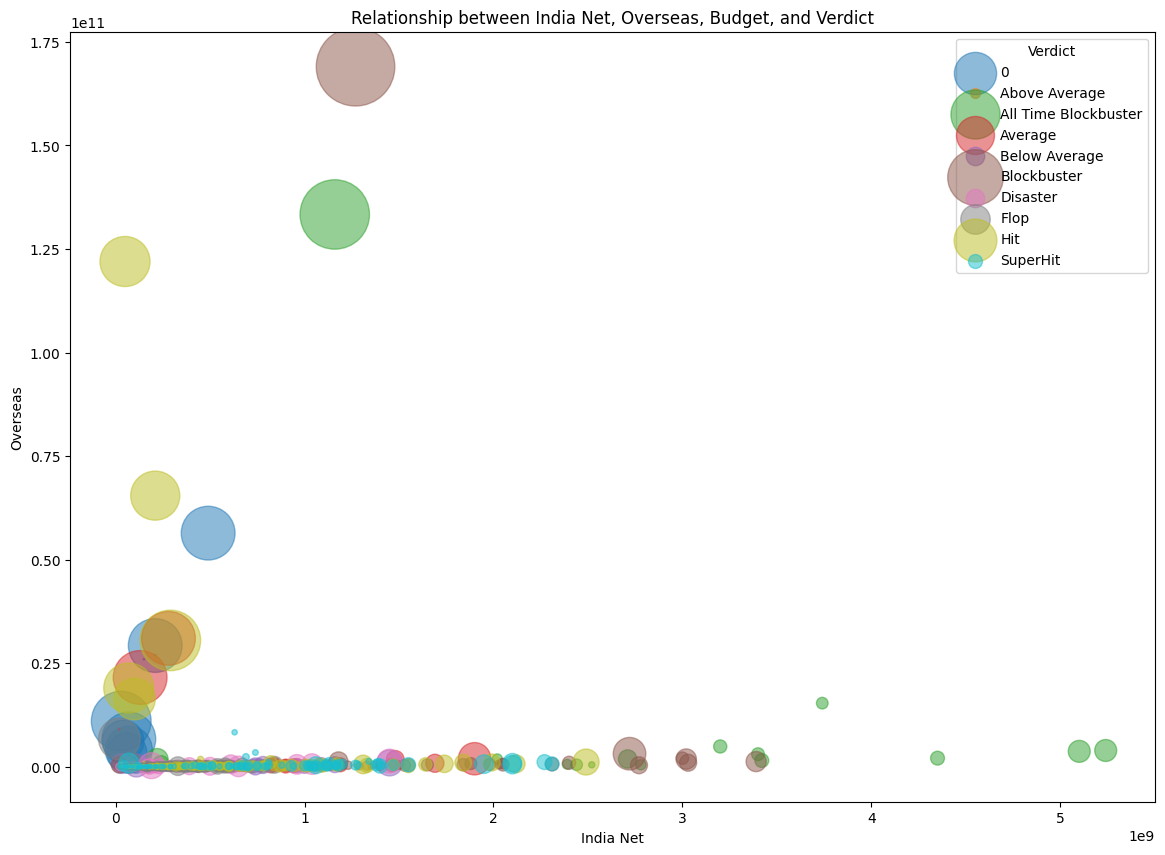

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data
data = pd.read_csv("datasets/Top_1000_Bollywood_Movies.csv")

fig, ax = plt.subplots(figsize=(14, 10))
for verdict, group in df.groupby("Verdict"):
    ax.scatter(group["India Net"], group["Overseas"], s=group["Budget"] / 1e7, label=verdict, alpha=0.5)

plt.xlabel("India Net", fontsize=10)
plt.ylabel("Overseas", fontsize=10)
plt.title("Relationship between India Net, Overseas, Budget, and Verdict")

ax.legend(title="Verdict")

plt.show()

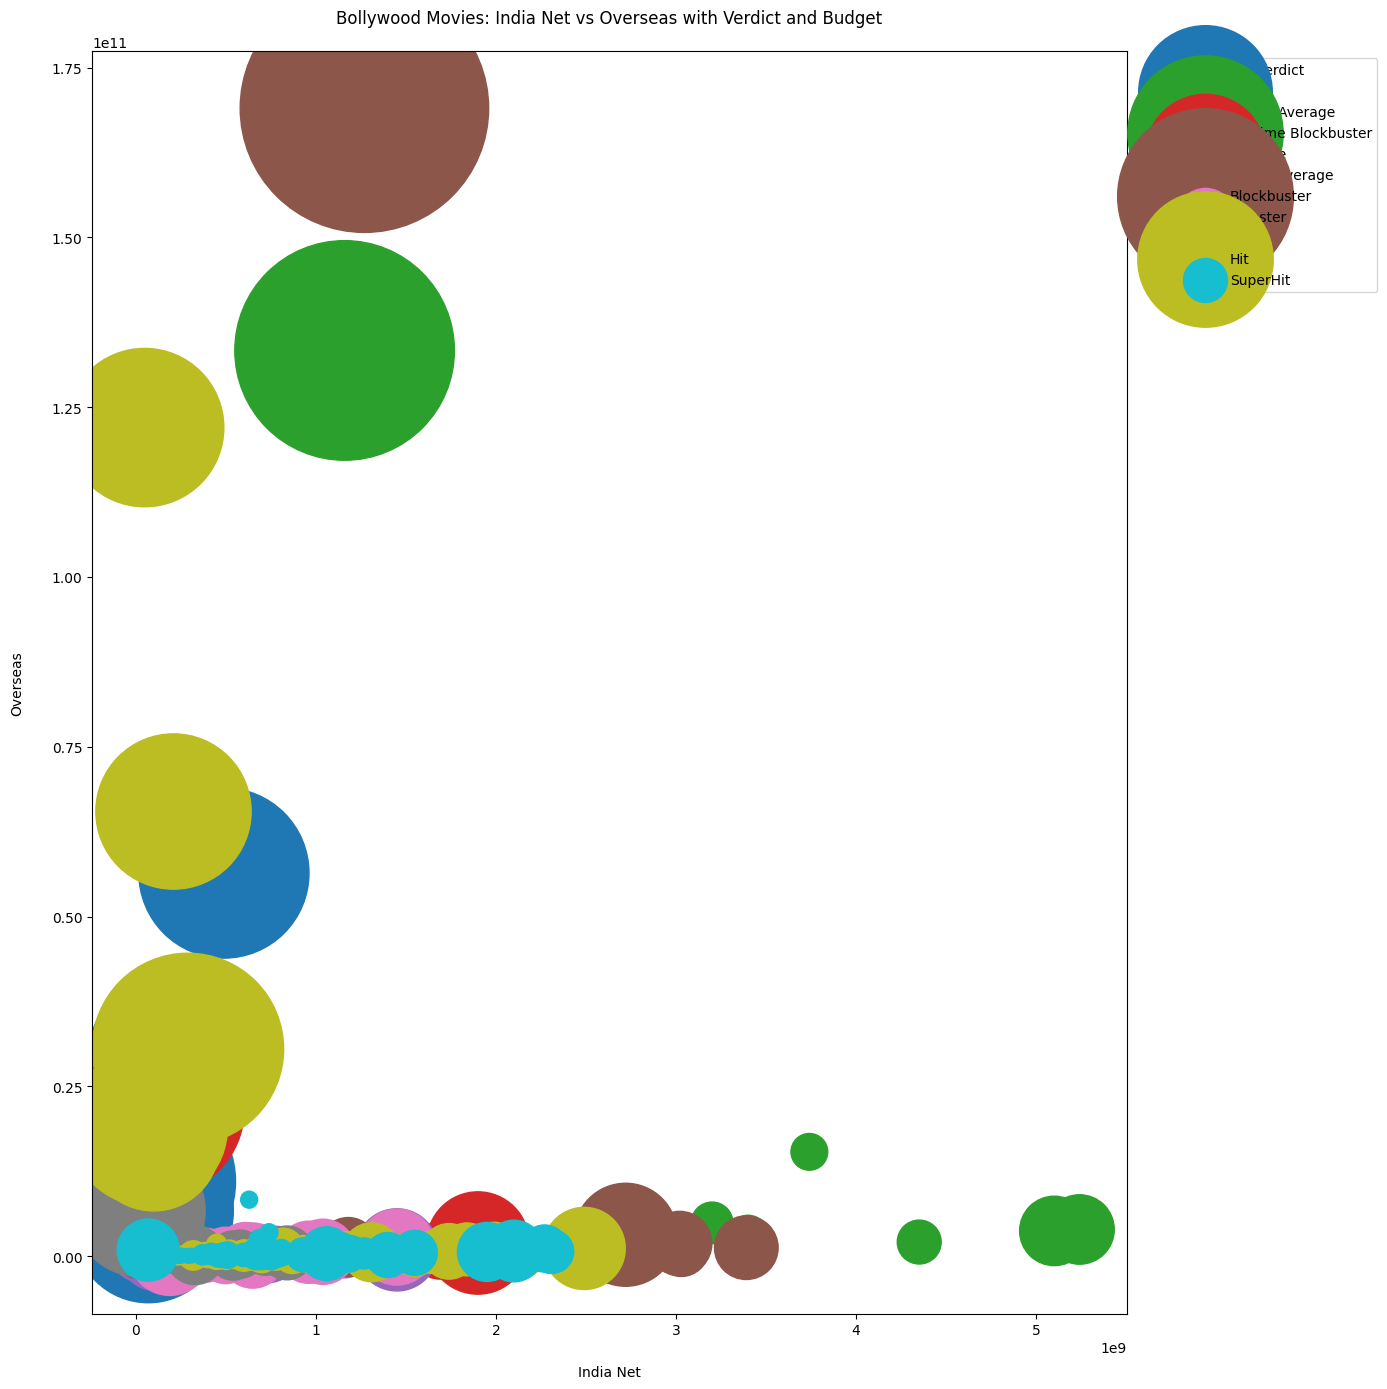

In [61]:
import matplotlib.pyplot as plt

# Set the plot size
plt.figure(figsize=(14, 14))

# Scatter plot with different colors for each 'Verdict' and sizes based on 'Budget'
for verdict, group in df.groupby('Verdict'):
    plt.scatter(group['India Net'], group['Overseas'], s=group['Budget']/1e6, label=verdict)

# Labeling
plt.title('Bollywood Movies: India Net vs Overseas with Verdict and Budget', pad=20)
plt.xlabel('India Net', labelpad=20)
plt.ylabel('Overseas', labelpad=20)
plt.legend(title='Verdict', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show plot
plt.tight_layout()
plt.show()